In [1]:
import numpy as np

import cv2

from scipy.ndimage import convolve

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
import glob

raws = []
ifrraws = []

offset = 0


ibp = np.asarray([float('inf') for i in range(3)])
iwp = np.zeros((3))
# for i in sorted(glob.glob("../photos/positives/France 1976/*.NEF")):
for i in sorted(glob.glob("../photos/misc old/normal/*.tiff"))[offset:]:
    # print(i)
    # raw = rawpy.imread(i)
    # # rpyraws.append(raw)
    pog = cv2.imread(i)

    pog = cv2.cvtColor(pog, cv2.COLOR_BGR2RGB)
    # # imcopy = raw.raw_image_visible.copy()
    # # pog = np.concatenate((
    # #     convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
    # #     convolve((imcopy*(raw.raw_colors_visible%2)), H_G)[:,:,np.newaxis],
    # #     convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    # # ), axis=2)
    # # pog = raw.postprocess(output_bps=16, user_wb=[1, 1, 1, 1], gamma=(1, 1), no_auto_bright=True, user_flip=0)
    # # pog = raw.postprocess(output_bps=16, gamma=(1, 1), user_flip=0)
    # pog = raw.postprocess(output_bps=16, user_wb=[1, 1, 1, 1], gamma=(1, 1), no_auto_bright=True, user_flip=0)
    pog = pog/pog.max()
    ibp = np.minimum(np.percentile(pog[300:-300:10, 300:-300:10], 0.01, axis=(0, 1)), ibp)
    iwp = np.maximum(np.percentile(pog[300:-300:10, 300:-300:10], 99.9, axis=(0, 1)), iwp)
    # pog = pog/pog.max()
    # print(pog.shape)
    raws.append(pog)

for i in sorted(glob.glob("../photos/misc old/infra/*.tiff"))[offset:]:
    # print(i)
    # raw = rawpy.imread(i)
    # # rpyraws.append(raw)
    pog = cv2.imread(i)

    pog = cv2.cvtColor(pog, cv2.COLOR_BGR2RGB)
    # # imcopy = raw.raw_image_visible.copy()
    # # pog = np.concatenate((
    # #     convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
    # #     convolve((imcopy*(raw.raw_colors_visible%2)), H_G)[:,:,np.newaxis],
    # #     convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    # # ), axis=2)
    # # pog = raw.postprocess(output_bps=16, user_wb=[1, 1, 1, 1], gamma=(1, 1), no_auto_bright=True, user_flip=0)
    # # pog = raw.postprocess(output_bps=16, gamma=(1, 1), user_flip=0)
    # pog = raw.postprocess(output_bps=16, user_wb=[1, 1, 1, 1], gamma=(1, 1), no_auto_bright=True, user_flip=0)
    pog = pog/pog.max()
    # ibp = np.minimum(np.percentile(pog[300:-300:10, 300:-300:10], 0.01, axis=(0, 1)), ibp)
    # iwp = np.maximum(np.percentile(pog[300:-300:10, 300:-300:10], 99.9, axis=(0, 1)), iwp)
    # pog = pog/pog.max()
    # print(pog.shape)
    ifrraws.append(pog)
raws=np.asarray(raws)

ifrraws=np.asarray(ifrraws)

print(raws.size)

436724352


[0.05195623 0.01005025 0.00502513]
[0.44382623 0.15577889 0.07537688]


/tmp/ipykernel_27920/2307003909.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gridsize, gridsize,i+1)


[0.03703704 0.00529101 0.00529101]
[0.42328042 0.13227513 0.06349206]
[0.09309284 0.02030457 0.01015228]
[0.49746193 0.18781726 0.08457213]
[0.12669645 0.03169645 0.01669645]
[0.9  0.54 0.28]
[0.13092266 0.05025126 0.0268306 ]
[0.93467337 0.57788945 0.33659362]
[0.17169645 0.06669645 0.035     ]
[0.98330355 0.63       0.365     ]
[0.08891944 0.01538462 0.01025641]
[0.43589744 0.17261903 0.08205128]
[0.06710242 0.0120582  0.01030928]
[0.45876289 0.18556701 0.09278351]


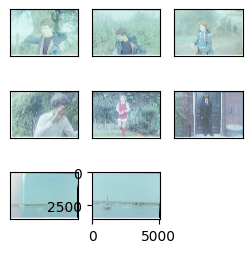

In [3]:
# plt.imshow(n[0][0].permute(1, 2, 0))
plt.figure(figsize=(3,3))


# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = len(raws)
outputs = []


gridsize = int(number**0.5//1+(number**0.5%1>0)*1)

for i in range(len(raws))[:number]:

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(gridsize, gridsize,i+1)
    # pog = rawsgamma[i + offset] 
    
    # pogmed = np.median(pog, (0, 1))
    # print(i)
    # toshow = (pog[::,::]-pogawbb)/(pogawbw-pogawbb)
    # print(toshow.max(), toshow.min())

    wbd = np.clip((raws[i]), 0, 1)
    # wbd = wbds[i]
    low = np.percentile(wbd[300:-300:10, 300:-300:10], 0.001, axis=(0, 1))
    high = np.percentile(wbd[300:-300:10, 300:-300:10], 99.999, axis=(0, 1))
    # high  = ibp 
    # print(high)
    # print(low)
    # low = ibp * [1, 1, 1]
    # high = iwp
    high, low = low, high
    print(high)
    print(low)
    # toshow = wbd
    toshow = ( wbd -  low)/(high - low)
    toshow = np.clip(toshow, 0,1)**(1/2.2)
    tmp = (toshow * 255).astype(np.uint8)
    # cv2.imwrite("outputfile"+str(i)+".jpg", cv2.cvtColor(tmp, cv2.COLOR_RGB2BGR))
    outputs.append(toshow)
    plt.imshow(toshow*[1, 1, 1])

0.047619047619047616 1.0


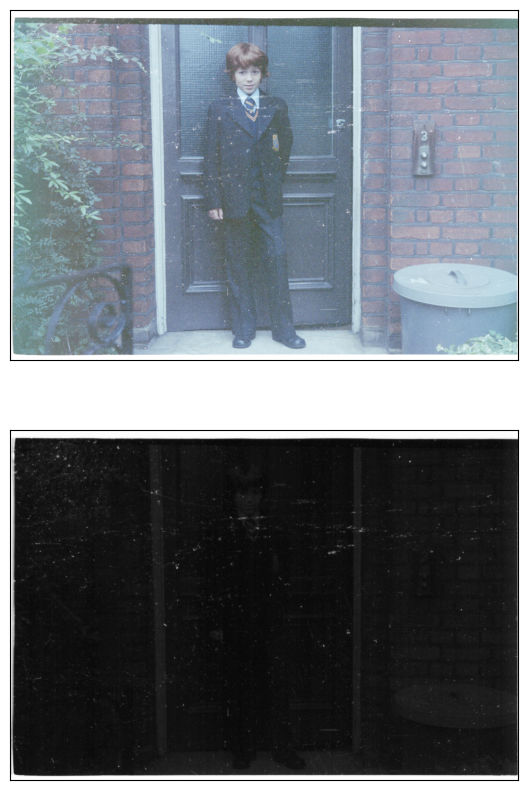

In [4]:
plt.figure(figsize=(10,10))


offset = 5
outputs = []

plt.subplot(2, 1,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)

wbd = np.clip((raws[offset]), 0, 1)
# wbd = wbds[i]
low = np.percentile(wbd[300:-300:10, 300:-300:10], 0.001, axis=(0, 1))
high = np.percentile(wbd[300:-300:10, 300:-300:10], 99.999, axis=(0, 1))
high, low = low, high
    # toshow = wbd
toshow = ( wbd -  low)/(high - low)
toshow = np.clip(toshow, 0,1)**(1/2.2)
tmp = (toshow * 255).astype(np.uint8)
# cv2.imwrite("outputfile"+str(i)+".jpg", cv2.cvtColor(tmp, cv2.COLOR_RGB2BGR))
outputs.append(toshow)
plt.imshow(toshow*[1, 1, 1])

plt.subplot(2, 1,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)

wbd = np.clip((ifrraws[offset]), 0, 1)

wbd = np.add.reduce(wbd, axis = 2 ) / 3

print(wbd.min(), wbd.max())

# # low = np.percentile(wbd[300:-300:4, 300:-300:4], 1, axis=(0, 1))
# high = np.percentile(wbd[300:-300:4, 300:-300:4], 1.1, axis=(0, 1))
    # toshow = wbd

# print(low, high)
# toshow = ( wbd -  low)/(high - low)
toshow = np.clip(wbd, 0, 1)
tmp = (toshow * 255).astype(np.uint8)
# cv2.imwrite("outputfile"+str(i)+".jpg", cv2.cvtColor(tmp, cv2.COLOR_RGB2BGR))
outputs.append(toshow)
plt.imshow(toshow, cmap="Greys")



0.0028074520490901644 0.9518398268398268 (3543, 5136)
0.0 25.0
0.0 1.0


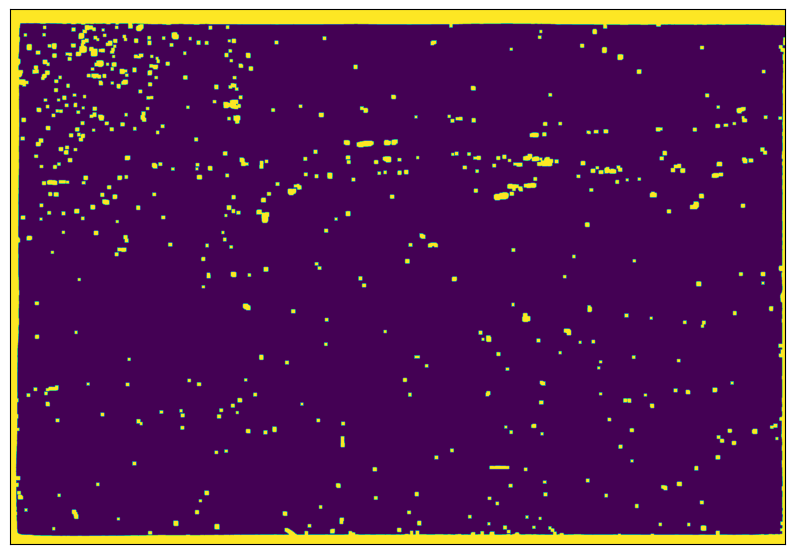

In [5]:
originalmask = 1-cv2.resize(outputs[1], outputs[0].shape[1::-1])
print(originalmask.min(), originalmask.max(), originalmask.shape)


originalmask = (originalmask > np.percentile(originalmask[400: -400, 400: -400], 99.7)) * np.ones(originalmask.shape)

sqsize = 5
mask = convolve(originalmask, np.ones((sqsize, sqsize)))
print(mask.min(), mask.max())
mask = np.clip(mask, 0, 1)
print(mask.min(), mask.max())

sqsize = 51
gaussmask = cv2.GaussianBlur(originalmask, (sqsize, sqsize), 0)

sqsize = 19
largeconvmask = convolve(originalmask, np.ones((sqsize, sqsize)))
largeconvmask = np.clip(largeconvmask, 0, 1)




plt.figure(figsize=(10,10))

plt.subplot(1, 1,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.imshow(largeconvmask)



In [6]:
raw = raws[offset]

rawgrey = np.average(raw, 2)# np.average.reduce(raw, 2)
threshs = np.percentile(rawgrey[400: -400, 400: -400], np.asarray(range(0, 16), dtype=np.float32) * 0.05)

threshs = sorted(set(threshs))
plt.figure(figsize=(100,100))


# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = len(raws)
threshoutputs = []


gridsize = 4

for i in threshs:
    threshoutputs.append((rawgrey > i) * np.ones(rawgrey.shape))

# print("drawing")
# for i in range(len(threshs)):

#     plt.subplot(gridsize, gridsize, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)

#     plt.imshow((1 - threshoutputs[i]))

<Figure size 10000x10000 with 0 Axes>

In [7]:
raw = raws[offset]

rawgrey = np.average(raw, 2) #np.minimum.reduce(raw, 2)

threshs = np.percentile(rawgrey[400: -400, 400: -400], np.asarray(range(0, 16), dtype=np.float32) * 0.05)

print(sorted(set(threshs)))
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = len(raws)
threshscores = []


gridsize = 4

idealThresh = None
hiscore = 0



for i in range(len(threshs)):
    threshd = (rawgrey > threshs[i]) * np.ones(rawgrey.shape)
    masked = (1 - threshd) * largeconvmask
    unmasked = (1 - threshd) * (1 - largeconvmask)
    a = 0.8
    # (np.sum(unmasked) * a + (1 - a) * np.sum(largeconvmask)
    positive = np.sum(masked)
    score = positive - (np.sum(unmasked) * a + (1 - a) * np.sum(1 - threshd))
    threshscores.append(score)

    if score >= hiscore:
        hiscore = score
        idealThresh = threshs[i]

    if score < hiscore:
        break


    print(i, score, positive, np.sum(unmasked), np.sum(1 - threshd))

[0.049999999999999996, 0.19666666666666666, 0.21666666666666665, 0.22666666666666666, 0.22999999999999998, 0.2333333333333333, 0.23666666666666666, 0.2383333333333333, 0.24, 0.24166666666666667, 0.24333333333333332, 0.245, 0.24666666666666667, 0.24833333333333332, 0.25]
0 570881.6000000001 713602.0 0.0 713602.0
1 643951.8 806701.0 1409.0 808110.0
2 655309.0 827895.0 7007.0 834902.0
3 655668.4 839653.0 16054.0 855707.0


In [8]:
rawtoalign = (rawgrey[400: -400, 400: -400] > idealThresh) * np.ones(tuple(np.asarray(rawgrey.shape) - [800, 800]))

alignmask = gaussmask[400: -400, 400: -400]

offsets = np.asarray([1, 0])


hishift = None
hiscore = 1
phs = 0

limit = 300

workingshift = [0, 0]

while hiscore > phs and limit > 0:
    limit -= 1
    phs = hiscore
    hiscore = 0
    for i in range(4):
        thet = i * np.pi * 2 / 4
        shift = np.matmul(np.asarray([[np.cos(thet), -np.sin(thet)], [np.sin(thet), np.cos(thet)]]), offsets)
        shift = np.ndarray.astype(shift, np.int8) + workingshift

        # tmat = np.roll(np.asarray(range(16)).reshape((4,4)), offset, (0, 1))
        # # tmat[offset[0] if offset[0] < 0 else None : offset[0] if offset[0] > 0 else None] = 0
        # tmat[:, offset[1] if offset[1] < 0 else None : offset[1] if offset[1] > 0 else None] = 0
        # print(tmat)

        shiftedmask = np.roll(alignmask, shift, (0, 1))

        if shift[0] != 0:
            shiftedmask[shift[0] if shift[0] < 0 else None : shift[0] if shift[0] > 0 else None] = 0
        if shift[1] != 0:
            shiftedmask[:, shift[1] if shift[1] < 0 else None : shift[1] if shift[1] > 0 else None] = 0
        

        score = np.sum(shiftedmask * (1 - rawtoalign))

        if score > hiscore and score > phs:
            hiscore = score
            hishift = shift
    
    print(hiscore, limit, hishift)
    workingshift = hishift
    
offsetmask = np.roll(mask, hishift, (0, 1))

    



3336.2639677390607 299 [-1  0]
3417.5150495738253 298 [-2  0]
3474.888192396398 297 [-3  0]
3529.8274285163616 296 [-3 -1]
3568.2221107310825 295 [-3 -2]
3599.9118817626613 294 [-4 -2]
3620.467038002127 293 [-4 -3]
3622.7462551631374 292 [-5 -3]
3624.3822990263247 291 [-5 -4]
0 290 [-5 -4]


In [9]:
# plt.figure(figsize=(40,40))

# plt.subplot(1, 1,1)
# plt.xticks([])
# plt.yticks([])
# plt.grid(False)

# offsetmask = np.roll(mask, hishift, (0, 1))

# plt.imshow(outputs[0] * ( (1 - np.repeat(offsetmask[:, :, np.newaxis], 3, axis=2)) * [1,0,0] + [0, 1, 1]))

In [10]:
# plt.figure(figsize=(30,30))

# plt.subplot(1, 1,1)
# plt.xticks([])
# plt.yticks([])
# plt.grid(False)

# plt.imshow(outputs[0])

0 1


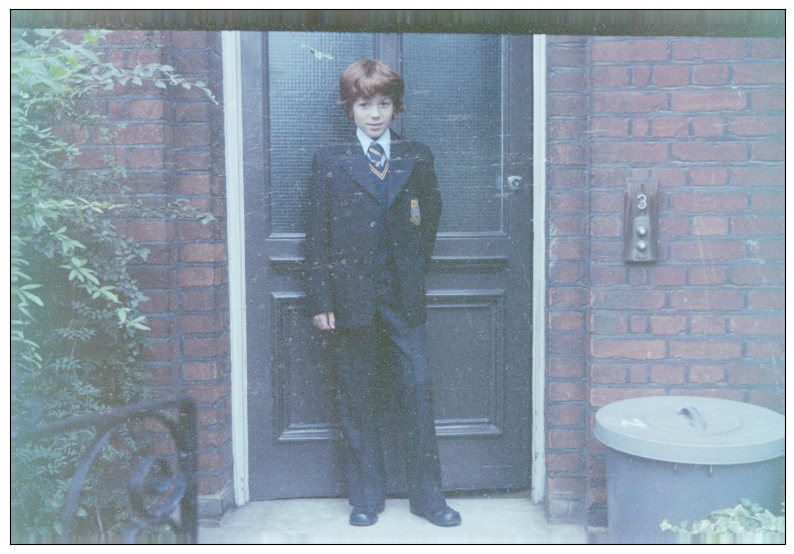

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(1, 1,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
typedreal = (outputs[0] * 2 ** 8).astype(np.uint8)



typedmask = (offsetmask).astype(np.uint8)

print(typedmask.min(), typedmask.max())

dst = cv2.inpaint(typedreal, typedmask, 3, cv2.INPAINT_TELEA)

plt.imshow(dst)

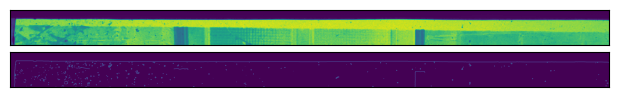

In [12]:
plt.figure(figsize=(10,1))

plt.subplot(2, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.imshow(rawgrey[:300])
plt.subplot(2, 1, 2)
plt.xticks([])
plt.yticks([])
plt.grid(False)

# lsd = cv2.LineSegmentDetector("Refine", "Standard")

# lines = lsd.detect()
plt.imshow(cv2.Canny((cv2.GaussianBlur(rawgrey[:300], (7, 7), 0) * 255).astype(np.uint8), 70, 80))
# lsd.drawSegments(rawgrey[:300:20], lines))

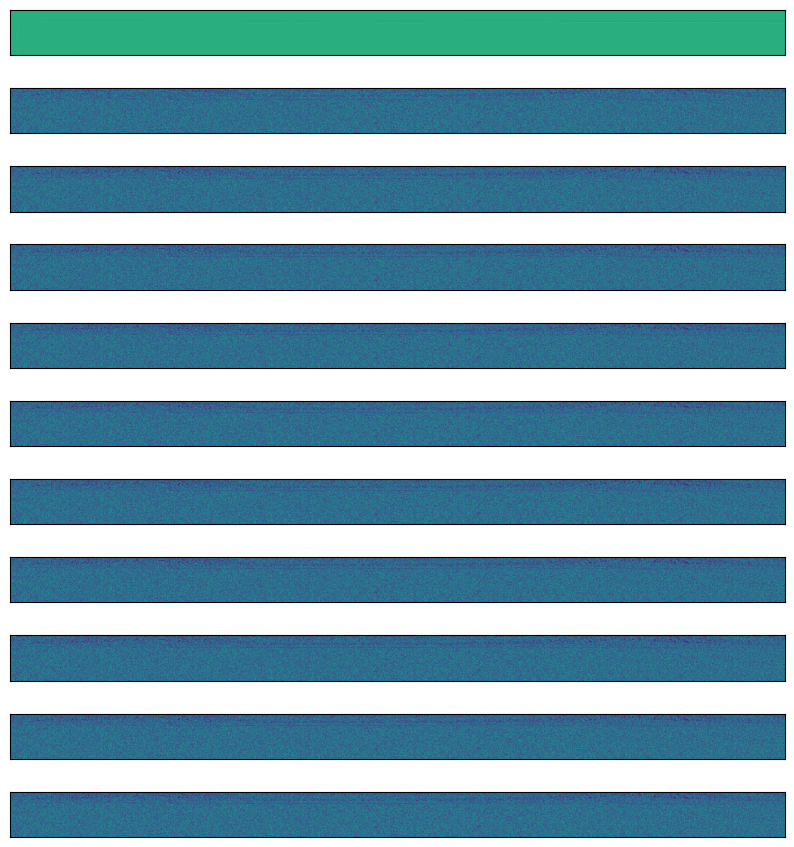

In [43]:
plt.figure(figsize=(10,11))

plt.subplot(11, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)

# toapplyon = rawgrey[:300]
toapplyon = convolve(rawgrey[:300], [[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
plt.imshow(toapplyon)


for i in range(10):

    plt.subplot(11, 1, i + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    t = 10 * i

    canny = cv2.Canny((toapplyon * 255).astype(np.uint8), t, 3 * t)

    plt.imshow(canny)

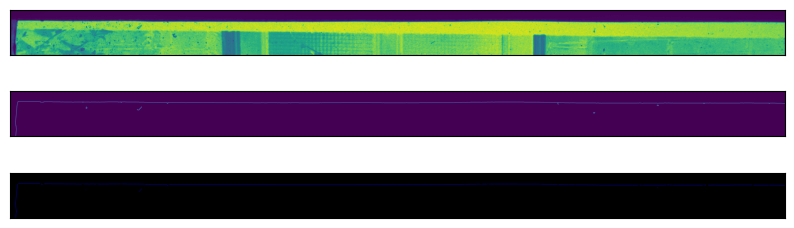

In [35]:
plt.figure(figsize=(10,3))

plt.subplot(3, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.imshow(rawgrey[:300])




plt.subplot(3, 1, 2)
plt.xticks([])
plt.yticks([])
plt.grid(False)

t = 30

canny = cv2.Canny((cv2.GaussianBlur(rawgrey[:300], (7, 7), 0) * 255).astype(np.uint8), 70, 210)

plt.imshow(canny)




plt.subplot(3, 1, 3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
lsd = cv2.createLineSegmentDetector(0)

lines, a, b, c = lsd.detect(canny)
plt.imshow(lsd.drawSegments((np.zeros(rawgrey[:300].shape) * 255).astype(np.uint8), lines))